<a href="https://colab.research.google.com/github/jspinaj/Computer-Vision/blob/main/Pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Jupyter Notebook


In [1]:
# Setup 
#pip uninstall opencv-python
# pip install opencv-contrib-python
import imageio
import time 
import numpy as np
import random
import pandas as pd
import os

import cv2
import matplotlib
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

import extraerROI as roi

print(os.getcwd())
os.chdir(os.getcwd()+"\Segundo Avance")

import trafficSignDetection as roi2

os.chdir("..")
print(os.getcwd())

keys=['Compacidad', 'Redondez', 'Relacion entre lados', 'Primer Momento', 'Segundo Momento', 'Tercer Momento', 'Cuarto Momento', 'Quinto Momento', 'Sexto Momento', 'Septimo Momento', 'Entropia', 'Porcentaje de Area Rellena', 'Umbral usado']


#keys=['Compacidad', 'Redondez', 'Relacion entre lados', 'Primer Momento', 'Segundo Momento', 'Entropia', 'Porcentaje de Area Rellena', 'Umbral usado']


e:\Documentos\u\11.Semester_XI\TIA\Computer-Vision
e:\Documentos\u\11.Semester_XI\TIA\Computer-Vision


[[21.316792678843573, 0.5895056917653005, 2.442211055276382, 2.142699350057445, 4.486479290272342, 7.261684984642928, 7.5008766151133175, 14.887529716134232, 9.838471888774622, 15.688135010915929, -6.695305, 7.95292766934558, 89, 173, 1806, 487, 200]]


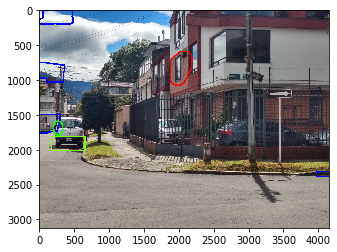

In [2]:
img_filename="data/traffic_signs/Flecha_Derecha/Flechader4.jpg"

#imagenROI,ima_umbralizada,var,ima_prueba= roi.extraccion_ROI(img_filename,"v")

t = time.time()

diccionario,region,imagenROI= roi2.detectROI(img_filename)
features=[]

for dic in diccionario:
    
    values=['Compacidad', 'Redondez', 'Relacion entre lados', 'Primer Momento', 'Segundo Momento', 'Tercer Momento', 'Cuarto Momento', 'Quinto Momento', 'Sexto Momento', 'Septimo Momento', 'Entropia', 'Porcentaje de Area Rellena', 'Umbral usado','x','y','w','h']
    _,prop=roi2.dict2list(dic,values)
    features.append(prop)


print(features)


filename = "data/my_gif.GIF"
#imageio.mimsave(filename, ima_prueba,fps=2)
#img_plot(img_og,img_processed,img_BW,filename_out)

#for k in range(len(ima_umbralizada)):
#    print(ima_umbralizada[k])

#print(ima_umbralizada)



#print(ima_umbralizada.size()) 
plt.imshow(imagenROI)


In [ ]:
# image ingest

image_list = open("data/traffic_filename_list.txt", "r")
data = []
properties = []
random.seed(10)

for img_filename in image_list:

    img_filename = img_filename.replace("\n", "")
    words = img_filename.split("/")
    img_category = words[2]
    if  True: #    
        #imagenROI, ima_umbralizada, properties, ima_prueba = roi.extraccion_ROI(
        #    img_filename, img_category)
        print(img_filename)
        diccionario,region,imagenROI= roi2.detectROI(img_filename)
        features=[]
        i=0
        for dic in diccionario:
            
            _,properties=roi2.dict2list(dic,values)
            features.append([img_filename,img_category]+properties+[i])
            i+=1
        # plt.imshow(imagenROI)

        #filename_out="data/output/"+words[3]
        filename_out = "G:/Unidades compartidas/TIA 2021-II/Imagenes/output/" + \
            words[3]
        cv2.imwrite(filename_out,cv2.cvtColor(imagenROI,cv2.COLOR_RGB2BGR))

        #for k in range(len(ima_umbralizada)):
        #    filename_segment = "G:/Unidades compartidas/TIA 2021-II/Imagenes/output/segments/" + \
        #        img_category+"_"+str(k)+"_"+words[3]
        #    cv2.imwrite(filename_segment, cv2.cvtColor(
        #        ima_umbralizada[k], cv2.COLOR_RGB2BGR))
        #    print(filename_segment)

        data+=features



In [4]:

# images properties dataframe
col_features = keys
col_names = ['img_filename', 'category']+values  +["index"]      

df = pd.DataFrame(data, columns=col_names)

#clean data
df.replace("", "Nan", inplace=True)
df.dropna( inplace=True)

csv_filename = "data/properties.csv"
df.to_csv(csv_filename)             # guardar datos a archivo csv


# print(df2)


NameError: name 'data' is not defined

In [15]:
# Properties Analysis
col_features = keys

csv_filename="data/properties.csv"
df=pd.read_csv(csv_filename)      # leer archivo csv para probar
category=pd.read_csv("data/category.csv")
#print(category)  
#print(df)

df['category']=category['category']

#df = df[df['category'] != "ruido"]      # eliminar ruidos

char=["Ceda_el_Paso","Flecha_Derecha","Pare","Prohibido_Parquear","Prohibido_giro_izquierda","Velocidad30","Velocidad40","Velocidad60","ruido"]

isSelected=df["category"]==char[0]

for c in char:
    isSelected=isSelected | (df["category"]==c)

df = df[isSelected]

print(df.groupby(['category']).size())

features=df[col_features]          # separando las propiedades del dataframe
corr_coef = features.corr()                     # coeficiente estadistico

mu=features.mean()                              # media de cada propiedad
sigma=features.var()                            # vector de varianzas  

#print(corr_coef)

# Normalization 
features=(features-mu)/sigma

# Perform PCA analysis
# dos formas de hacer PCA
#LAD
pca = PCA(n_components=3)       # 1. definiendo cantidad de componentes
#pca=PCA(0.8)                                    # 2. por grado semejanza
pca.fit(features)                               # aplicación 
print(pca.components_)
print("explained_varianc_ratio " + str(pca.explained_variance_ratio_))

reduced_features=pca.transform(features)     

df['pca1']=reduced_features[:,0]

df['pca2']=reduced_features[:,1]
#print(reduced_features[:,1])
#print(reduced_features)

category
Ceda_el_Paso                 54
Flecha_Derecha               16
Pare                         18
Prohibido_Parquear           21
Prohibido_giro_izquierda     23
Velocidad30                  31
Velocidad40                  21
Velocidad60                  11
ruido                       455
dtype: int64
[[ 9.75549475e-05 -9.83055032e-01  1.02160900e-01 -1.25133998e-01
  -5.57883364e-02 -3.83538332e-02 -3.27095446e-02  1.70406507e-03
   2.68279409e-03  6.36306850e-04 -4.28972551e-02 -1.84377354e-03
  -2.78962941e-04]
 [-1.22202770e-04  1.48132199e-01  3.32688377e-01 -8.04367835e-01
  -2.31539410e-01 -1.75625698e-01 -1.65050816e-01  3.35430859e-03
   6.01605819e-03  1.75191615e-03  3.29218910e-01 -1.47464795e-02
  -4.23640176e-03]
 [ 3.86893076e-05 -9.81989535e-02 -1.45928024e-01  2.57025143e-01
   8.72184900e-02  4.91188432e-02  6.96024679e-02 -2.92242502e-03
   1.95727957e-03  2.91583172e-04  9.42376360e-01  7.08123019e-03
  -1.32595263e-04]]
explained_varianc_ratio [0.72762499 0.

9


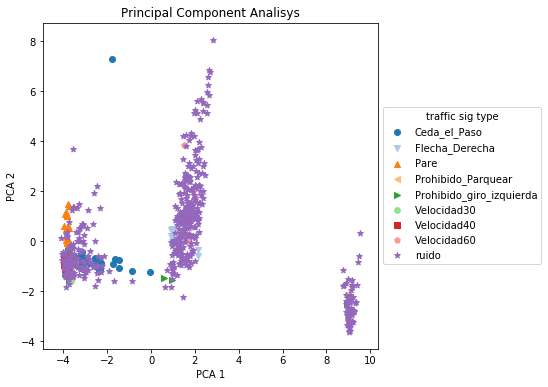

In [16]:
# Plot
categories = []

fig, ax = plt.subplots(figsize=(6, 6))
# "tab10" "tab20" "Pastel2" "Dark2" "Set3"
style = "tab20"
cmap = matplotlib.cm.get_cmap(style)
marker = ['o', 'v', '^', '<', '>', '8', 's',
          'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
t = 0
for ct, dfC in df.groupby('category'):
    scatter = plt.scatter(dfC.pca1, dfC.pca2, color=cmap(t), marker=marker[t])
    categories.append(ct)
    t = t+1

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Principal Component Analisys')
print(len(categories))
ax.legend(categories, loc='center left', bbox_to_anchor=(
    1, 0.5), title='traffic sig type')


# plt.show()


In [17]:
idx= np.random.randint(0,2,features.shape[0])

#dataframe information  for showing results 
df_results= df[idx!=0]


all_responses=pd.Categorical(df.category).codes
#all_responses = np.random.randint(0,10,(features.shape[0],1)).astype(np.float32)

all_data=features.to_numpy().astype(np.float32)

#PCA
all_data=reduced_features.astype(np.float32)

trainData=all_data[idx==0]
#responses=all_responses[idx==0]

lista=all_responses[idx==0]

responses=[]
for element in lista:
    responses.append([element])
responses=np.array(responses).astype(np.int32)

newcomer=all_data[idx!=0]

lista=all_responses[idx!=0]
check_responses=[]
for element in lista: 
    check_responses.append([element])
check_responses=np.array(check_responses).astype(np.float32)

#print(type(trainData))
#print(type(responses))

#print(trainData.shape)
#print(responses.shape)

knn = cv2.ml.KNearest_create()

knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)

ret, results, neighbours, dist = knn.findNearest(newcomer, 5)


#print ("results: ", results,"\n")
#print ("neighbours: ", neighbours,"\n")
#print ("distances: ", dist)
accuracy=0

for i in range(len(results)):
    if results[i]==check_responses[i]:
        accuracy+=1

print(accuracy)
print("accuracy:",accuracy," / ",len(results),"  ",100*accuracy/len(results)," %")

#print( np. concatenate((results, check_responses), axis=1))
#print(results[1])
#print(check_responses[1])

252
accuracy: 252  /  337    74.77744807121661  %


In [18]:

filename_out = "G:/Unidades compartidas/TIA 2021-II/Imagenes/output/results/"

for k in range(df_results.shape[0]):
    element=df_results.iloc[k]
    words = element.img_filename.split("/")
    img= cv2.imread(element.img_filename)
    idx=int(results[k][0])
    print(element.img_filename)
    x=element.x
    y=element.y
    h=element.h
    w=element.w
    cv2.rectangle(img,(x,y),(x+w,y+h),(120,255,0),15)
    cv2.putText(img,categories[idx],(40,160),2,8,(87,35,100),10)
    cv2.imwrite(filename_out+words[3],img)

#path=

data/traffic_signs/Ceda_el_Paso/Cedapaso10.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso11.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso11.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso11.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso11.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso12.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso12.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso13.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso13.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso14.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso14.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso14.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso15.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso15.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso16.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso16.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso17.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso17.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso18.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso18.jpg
data/traffic_signs/Ceda_el_Paso/Cedapaso2.jpg
data/traffic_s

In [11]:
print(img.shape[1])

2764


In [ ]:
lista=pd.Categorical(df.category).codes
all_responses=[]
for element in lista:
    all_responses.append([element])

aleatorio = np.random.randint(0,10,(features.shape[0],1)).astype(np.float32)
print(all_responses)

#print(aleatorio)
#print(responses)


In [ ]:
print(features.shape[0])

In [ ]:

trainData = np.random.randint(0,500,(51,10)).astype(np.float32)
responses = np.random.randint(0,10,(51,1)).astype(np.float32)

red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')


newcomer = np.random.randint(0,100,(5,10)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')


print(type(trainData))
print(type(responses))

knn = cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)


In [ ]:

img_filename="data/Prohibidoparq_ideal.png"

img_ideal=cv2.imread(img_filename) 
img_og=cv2.imread("data/traffic_signs/Prohibido_Parquear/Prohibidoparq13.jpg")

vector_size=15
#alg= cv2.SIFT_create()
alg = cv2.AKAZE_create()

kp1, des1 = alg.detectAndCompute(img_ideal,None)
kp2, des2 = alg.detectAndCompute(img_og,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

print(type(des1))

print(type(des2))

# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
print(matches[1])


list_x = []
list_y = []

# For each match...
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt

    # Append to each list
    list_x.append(x2)
    list_y.append(y2)



img3 = cv2.drawMatches(img_ideal,kp1,img_og,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#cv2.drawContours(img_og,list_kp2, -1, (0, 255, 0), 3)
start_point = (int(min(list_x)),int(min(list_y)))
end_point = (int(max(list_x)),int(max(list_y)))
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 10
print(start_point)
cv2.rectangle(img_og,start_point, end_point,color,thickness  )
for i in range(len(list_x)):
    cv2.circle(img_og,(int(list_x[i]),int(list_y[i])),60,color,-1)
cv2.imwrite('data/out.jpg',img_og)
plt.imshow(img_og),plt.show()


In [ ]:


print(categories)

df_cla = [x for _, x in df.groupby('category')]
print(df)
